In [1]:
library(ggplot2)
library(gridExtra)
library(reshape2)
library(GGally)

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



In [2]:
df_fb <- read.csv("C:/Users/kgtrm/Documents/R projects data/pseudo_facebook.tsv", sep = "\t")

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'

Warning message:
"Removed 11701 rows containing non-finite values (stat_smooth)."
Warning message:
"Removed 11701 rows containing missing values (geom_point)."


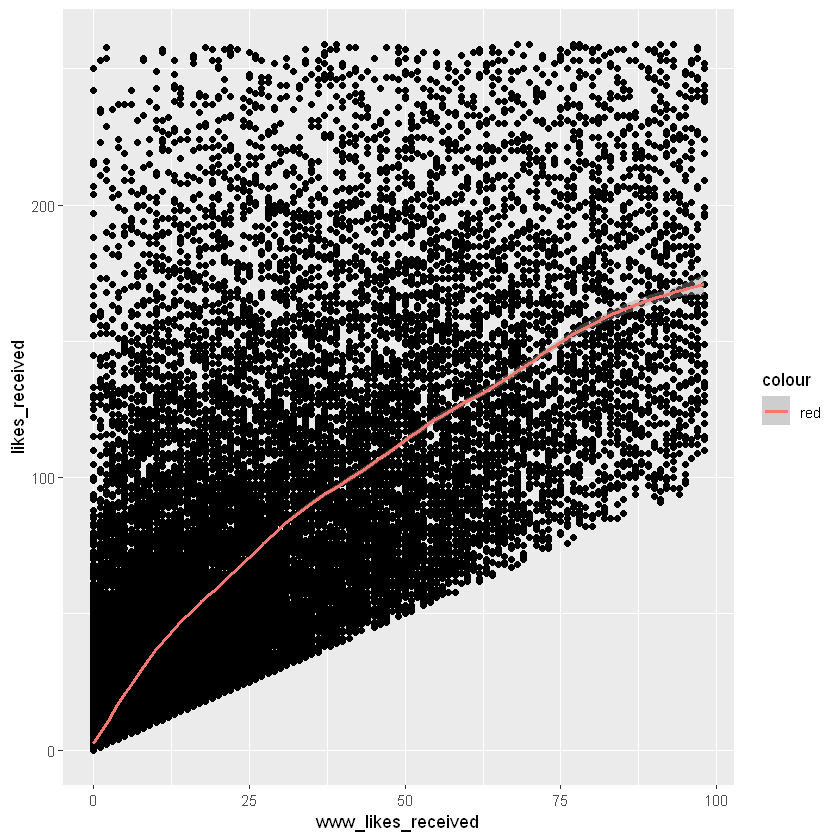

In [10]:
ggplot(aes(x = www_likes_received, y = likes_received), data = df_fb) +
    geom_point() +
    xlim(0, quantile(df_fb$www_likes_received, 0.9)) +
    ylim(0, quantile(df_fb$likes_received, 0.9)) +
    geom_smooth(aes(color = "red"))
# couldn't use all parameters from theirs. kept failing

Warning message:
"Removed 11701 rows containing missing values (geom_point)."


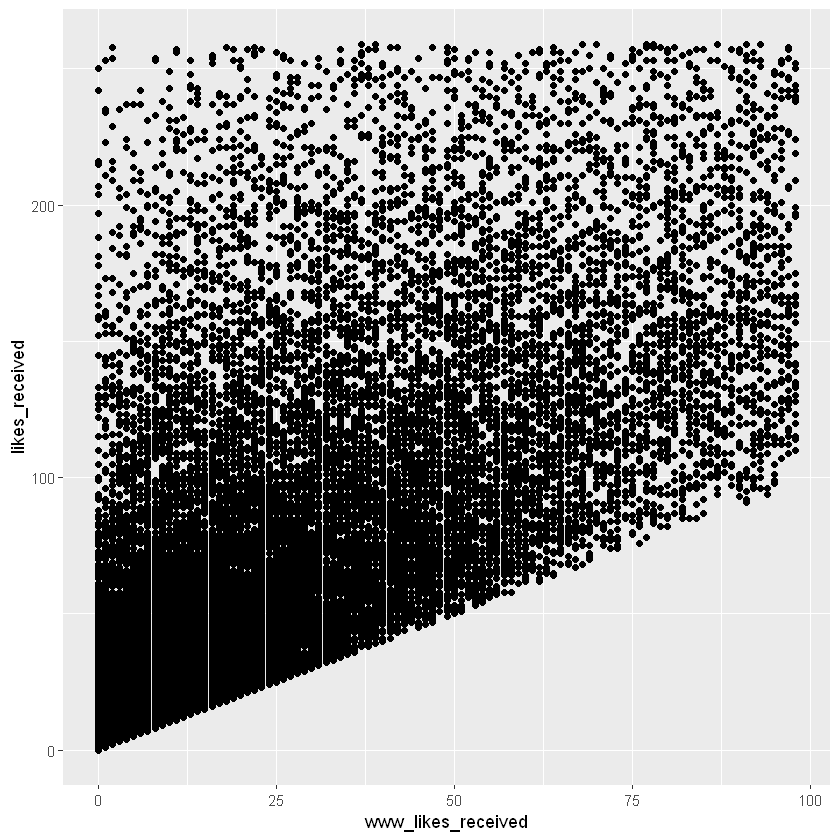

In [12]:
ggplot(aes(x = www_likes_received, y = likes_received), data = df_fb) +
    geom_point() +
    xlim(0, quantile(df_fb$www_likes_received, 0.9)) +
    ylim(0, quantile(df_fb$likes_received, 0.9))

Warning message:
"Removed 6 rows containing missing values (geom_point)."


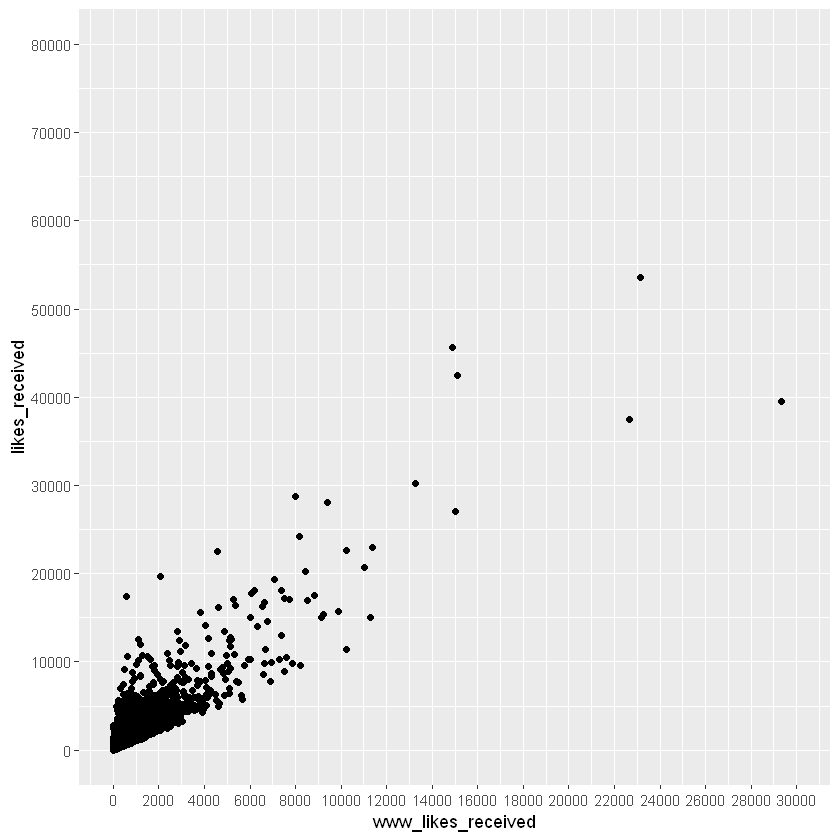

In [13]:
# scatterplot of www_likes vs total likes received
qplot(data = df_fb, x = www_likes_received, y = likes_received) +
    scale_x_continuous(limits = c(0, 30000), breaks = seq(0, 30000, 2000))+
    scale_y_continuous(limits = c(0, 80000), breaks = seq(0, 80000, 10000))

In [14]:
# correlation test between www_likes and total likes
cor.test(df_fb$www_likes_received, df_fb$likes_received)


	Pearson's product-moment correlation

data:  df_fb$www_likes_received and df_fb$likes_received
t = 937.1, df = 99001, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9473553 0.9486176
sample estimates:
      cor 
0.9479902 


In [16]:
# new column to show age in months
df_fb$age_by_month <- NULL
df_fb$age_with_months <- df_fb$age + (12 - df_fb$dob_month) / 12

In [18]:
library(dplyr)


Attaching package: 'dplyr'


The following object is masked from 'package:gridExtra':

    combine


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [25]:
# bin ages in months; create new dataframe that has mean
# and median friend counts for each in months
age_month_groups <- group_by(df_fb, age_with_months)
df_fb_by_age_months <- summarize(age_month_groups,
                                mean_friend_count = mean(friend_count),
                                median_friend_count = median(friend_count),
                                n = n())
df_fb_by_age_months <- arrange(df_fb_by_age_months, age_with_months)
df_fb_by_age_months$age_with_months <- as.numeric(df_fb_by_age_months$age_with_months)

age_groups <- group_by(df_fb, age)
df_fb_by_age <- summarize(age_groups,
                         mean_friend_count = mean(friend_count),
                         median_friend_count = median(friend_count),
                         n = n())
df_fb_by_age <- arrange(df_fb_by_age, age)
df_fb_by_age$age <- as.numeric(df_fb_by_age$age)

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



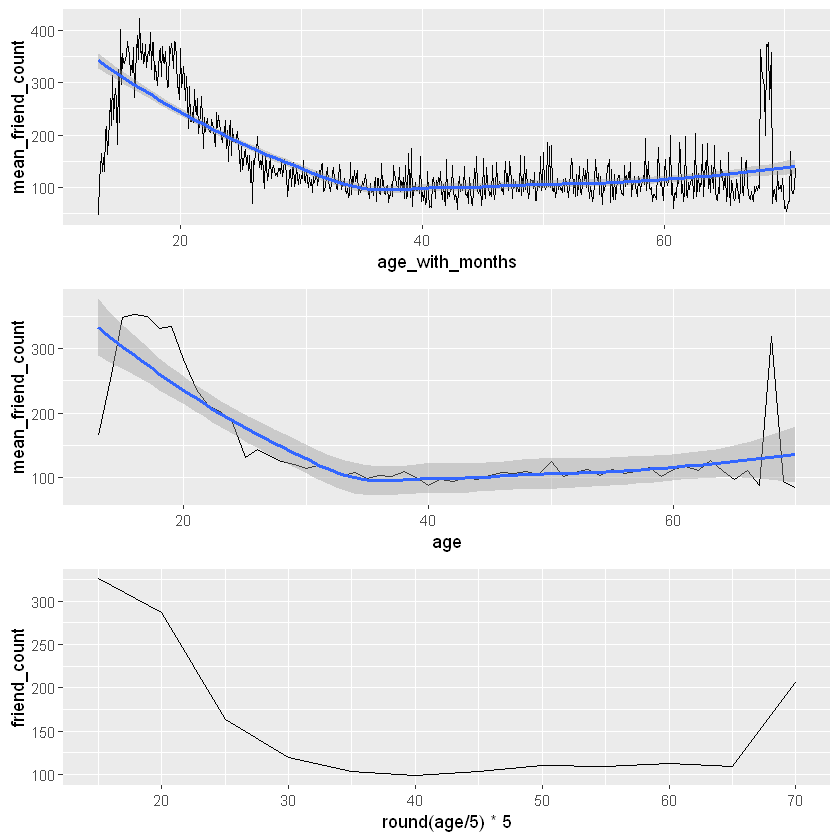

In [32]:
p1 <- ggplot(aes(x = age_with_months, y = mean_friend_count),
            data = subset(df_fb_by_age_months, subset = age_with_months < 71)) +
    geom_line()+
    geom_smooth()

p2 <- ggplot(aes(x = age, y = mean_friend_count),
            data = subset(df_fb_by_age, subset = age < 71)) +
    geom_line()+
    geom_smooth()

p3 <- ggplot(aes(x = round(age/5)*5, y = friend_count),
            data = subset(df_fb, subset = age < 71)) +
    geom_line(stat = "summary", fun = mean)

grid.arrange(p1, p2, p3, ncol = 1)


Warning message:
"Removed 2949 rows containing non-finite values (stat_boxplot)."
Warning message:
"Removed 2949 rows containing non-finite values (stat_summary)."


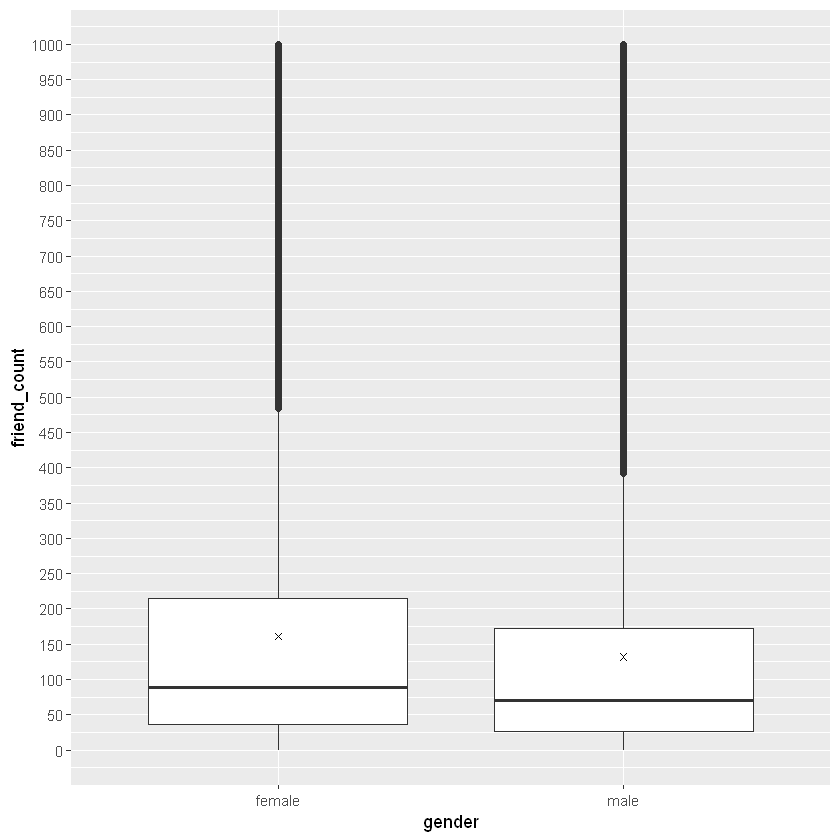

In [35]:
ggplot(aes(x = gender, y = friend_count), 
       data = subset(df_fb, !is.na(gender)))+
    geom_boxplot() +
    scale_y_continuous(limits = c(0, 1000), breaks = seq(0, 1000, 50)) +
    stat_summary(fun = mean, geom = "point", shape = 4)

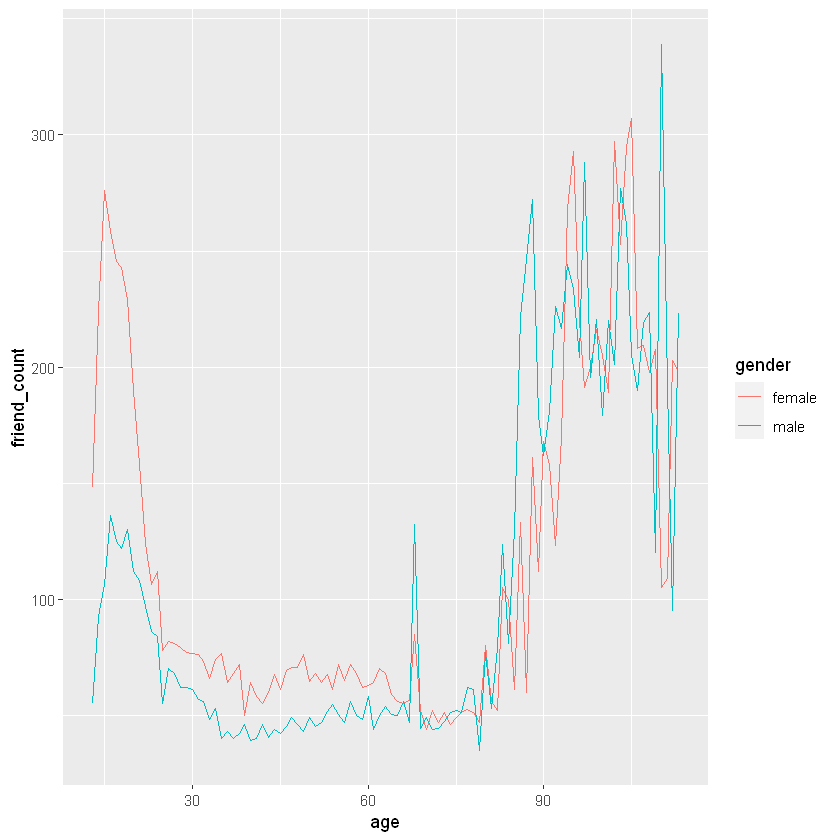

In [38]:
ggplot(aes(x = age, y = friend_count),
          data = subset(df_fb, !is.na(gender))) +
    geom_line(aes(color = gender), stat = "summary", fun = median)

In [39]:
age_groups <- group_by(df_fb, age, gender)
df_fb_by_age_gender <- summarize(age_groups,
                         mean_friend_count = mean(friend_count),
                         median_friend_count = median(friend_count),
                         n = n())
df_fb_by_age_gender <- arrange(df_fb_by_age_gender, age)
df_fb_by_age_gender

`summarise()` has grouped output by 'age'. You can override using the `.groups` argument.



age gender mean_friend_count median_friend_count n   
1   13  female 259.1606          148.0                193
2   13  male   102.1340           55.0                291
3   14  female 362.4286          224.0                847
4   14  male   164.1456           92.5               1078
5   15  female 538.6813          276.0               1139
6   15  male   200.6658          106.5               1478
7   15  NA     116.0000          116.0                  1
8   16  female 519.5145          258.5               1238
9   16  male   239.6748          136.0               1848
10  17  female 538.9943          245.5               1236
11  17  male   236.4924          125.0               2045
12  17  NA     106.5000          106.5                  2
13  18  female 481.9794          243.0               2037
14  18  male   233.9183          122.0               3159
15  19  female 470.8007          229.0               1606
16  19  male   254.5841          130.0               2784
17  19  NA     374.0000          374.0                  1
18  20  female 380.8244          190.0               1407
19  20  male   225.5921          112.0               2361
20  20  NA      65.0000           65.0                  1
21  21  female 307.1064          158.0               1335
22  21  male   195.3208          108.0               2335
23  21  NA      79.0000           79.0                  1
24  22  female 251.9152          124.0               1132
25  22  male   187.2532           97.0               1900
26  23  female 239.7211          106.5               1438
27  23  male   184.9214           86.0               2964
28  23  NA     246.5000          246.5                  2
29  24  female 237.0738          112.0                975
30  24  male   158.6722           84.0               1852
... ... ...    ...               ...                 ... 
245 102 NA     1346.5000         1346.5                 2
246 103 female  520.0741          253.0               405
247 103 male    427.8590          277.0               631
248 103 NA      280.8750          188.5                 8
249 104 female  443.0256          295.0                39
250 104 male    414.0000          262.0                34
251 105 female  400.3103          307.0                29
252 105 male    415.4468          205.0                47
253 105 NA      187.5000          161.5                 4
254 106 female  370.2051          208.0                39
255 106 male    288.3059          190.0                85
256 106 NA       68.0000           68.0                 1
257 107 female  315.3421          209.5                38
258 107 male    393.3500          219.0                60
259 108 female  371.8670          197.5               624
260 108 male    369.4390          223.5              1016
261 108 NA      281.7619          198.0                21
262 109 female  207.5000          207.5                 2
263 109 male    163.0000          120.0                 7
264 110 female  239.1429          105.0                 7
265 110 male    410.5714          339.0                 7
266 110 NA      503.0000          503.0                 1
267 111 female  244.4286          109.0                 7
268 111 male    246.5000          191.5                10
269 111 NA      148.0000          148.0                 1
270 112 female  201.2000          203.0                 5
271 112 male    594.0769           95.0                13
272 113 female  278.6571          198.0               105
273 113 male    410.3956          223.0                91
274 113 NA      166.3333          101.0                 6

In [42]:
# using piping
pf.fb_by_age_gender <- df_fb %>%
    filter(!is.na(gender)) %>%
    group_by(age, gender) %>%
    summarize(mean_friend_count = mean(friend_count),
             median_friend_count = median(friend_count),
             n = n()) %>%
    ungroup() %>%
    arrange(age)

pf.fb_by_age_gender

`summarise()` has grouped output by 'age'. You can override using the `.groups` argument.



age gender mean_friend_count median_friend_count n   
1   13  female 259.1606          148.0                193
2   13  male   102.1340           55.0                291
3   14  female 362.4286          224.0                847
4   14  male   164.1456           92.5               1078
5   15  female 538.6813          276.0               1139
6   15  male   200.6658          106.5               1478
7   16  female 519.5145          258.5               1238
8   16  male   239.6748          136.0               1848
9   17  female 538.9943          245.5               1236
10  17  male   236.4924          125.0               2045
11  18  female 481.9794          243.0               2037
12  18  male   233.9183          122.0               3159
13  19  female 470.8007          229.0               1606
14  19  male   254.5841          130.0               2784
15  20  female 380.8244          190.0               1407
16  20  male   225.5921          112.0               2361
17  21  female 307.1064          158.0               1335
18  21  male   195.3208          108.0               2335
19  22  female 251.9152          124.0               1132
20  22  male   187.2532           97.0               1900
21  23  female 239.7211          106.5               1438
22  23  male   184.9214           86.0               2964
23  24  female 237.0738          112.0                975
24  24  male   158.6722           84.0               1852
25  25  female 153.8835           78.0               1193
26  25  male   120.0729           55.0               2443
27  26  female 175.1344           82.0                915
28  26  male   129.0521           70.0               1899
29  27  female 158.7244           81.0                762
30  27  male   121.5538           68.0               1477
... ... ...    ...               ...                 ... 
173  99 female 557.5600          216.0                 25
174  99 male   343.1250          220.5                 56
175 100 female 338.6985          205.0                136
176 100 male   373.7869          179.0                183
177 101 female 428.9841          189.0                 63
178 101 male   373.6739          220.0                 92
179 102 female 471.6111          297.0                 72
180 102 male   415.1504          201.0                113
181 103 female 520.0741          253.0                405
182 103 male   427.8590          277.0                631
183 104 female 443.0256          295.0                 39
184 104 male   414.0000          262.0                 34
185 105 female 400.3103          307.0                 29
186 105 male   415.4468          205.0                 47
187 106 female 370.2051          208.0                 39
188 106 male   288.3059          190.0                 85
189 107 female 315.3421          209.5                 38
190 107 male   393.3500          219.0                 60
191 108 female 371.8670          197.5                624
192 108 male   369.4390          223.5               1016
193 109 female 207.5000          207.5                  2
194 109 male   163.0000          120.0                  7
195 110 female 239.1429          105.0                  7
196 110 male   410.5714          339.0                  7
197 111 female 244.4286          109.0                  7
198 111 male   246.5000          191.5                 10
199 112 female 201.2000          203.0                  5
200 112 male   594.0769           95.0                 13
201 113 female 278.6571          198.0                105
202 113 male   410.3956          223.0                 91

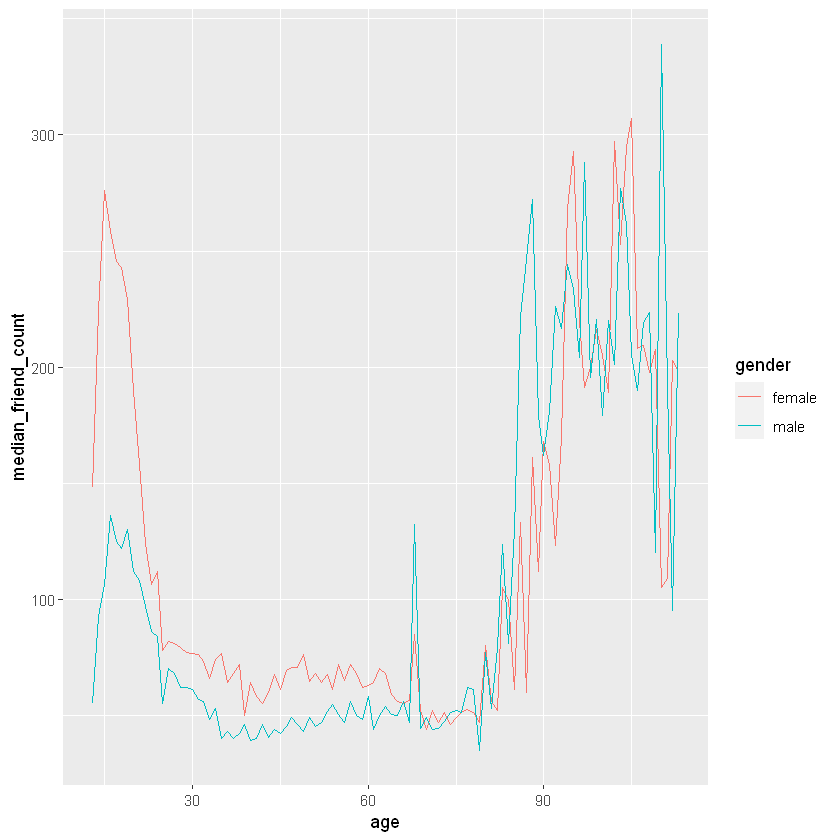

In [44]:
ggplot(aes(x = age, y = median_friend_count), data = pf.fb_by_age_gender) +
    geom_line(aes(color= gender), stat = "summary", fun = median)

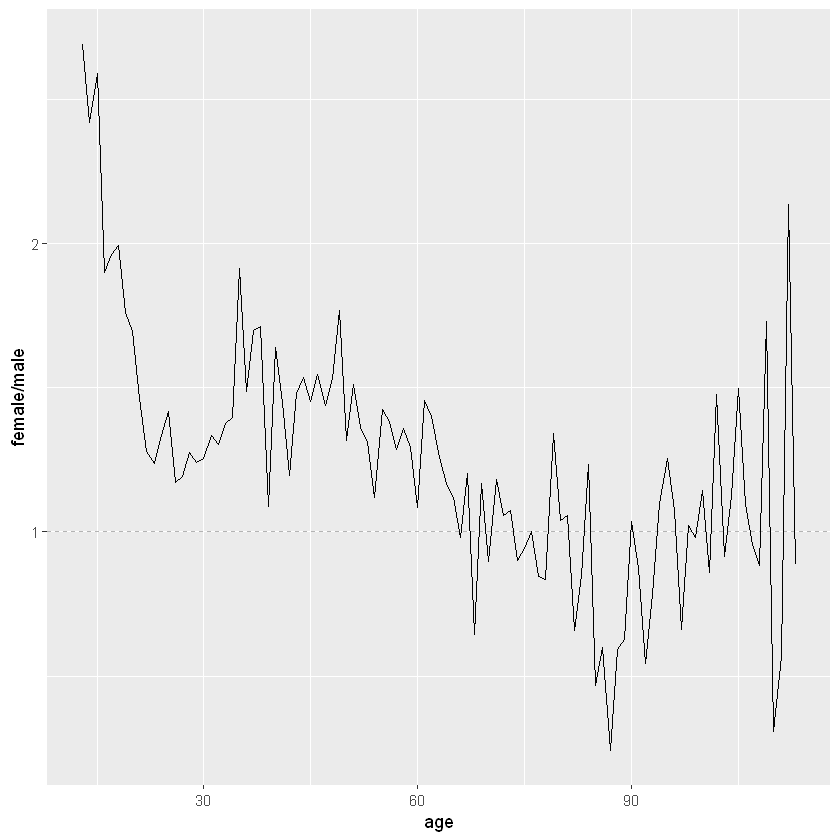

In [46]:
# convert to wide format using package reshape2
df_fb_wide <- dcast(pf.fb_by_age_gender,
                   age ~ gender,
                   value.var = "median_friend_count")

# ratio of friend_counts of both genders
ggplot(aes(x = age, y = female/male), data = df_fb_wide) +
    geom_line() +
    geom_hline(yintercept = 1, alpha = 0.3, linetype = 2)

In [47]:
# consider tenure while analyzing friend_count
# create new variable called year_joined
# recall tenure is days snce joined and this data is from 2014
df_fb$year_joined <- as.integer(2014 - df_fb$tenure/365)
# could also use <- floor(2014 - df_fb$tenure/365)

# buckets for year_joined
df_fb$year_joined.buckets <- cut(df_fb$year_joined,
                                c(2004, 2009, 2011, 2012, 2014))

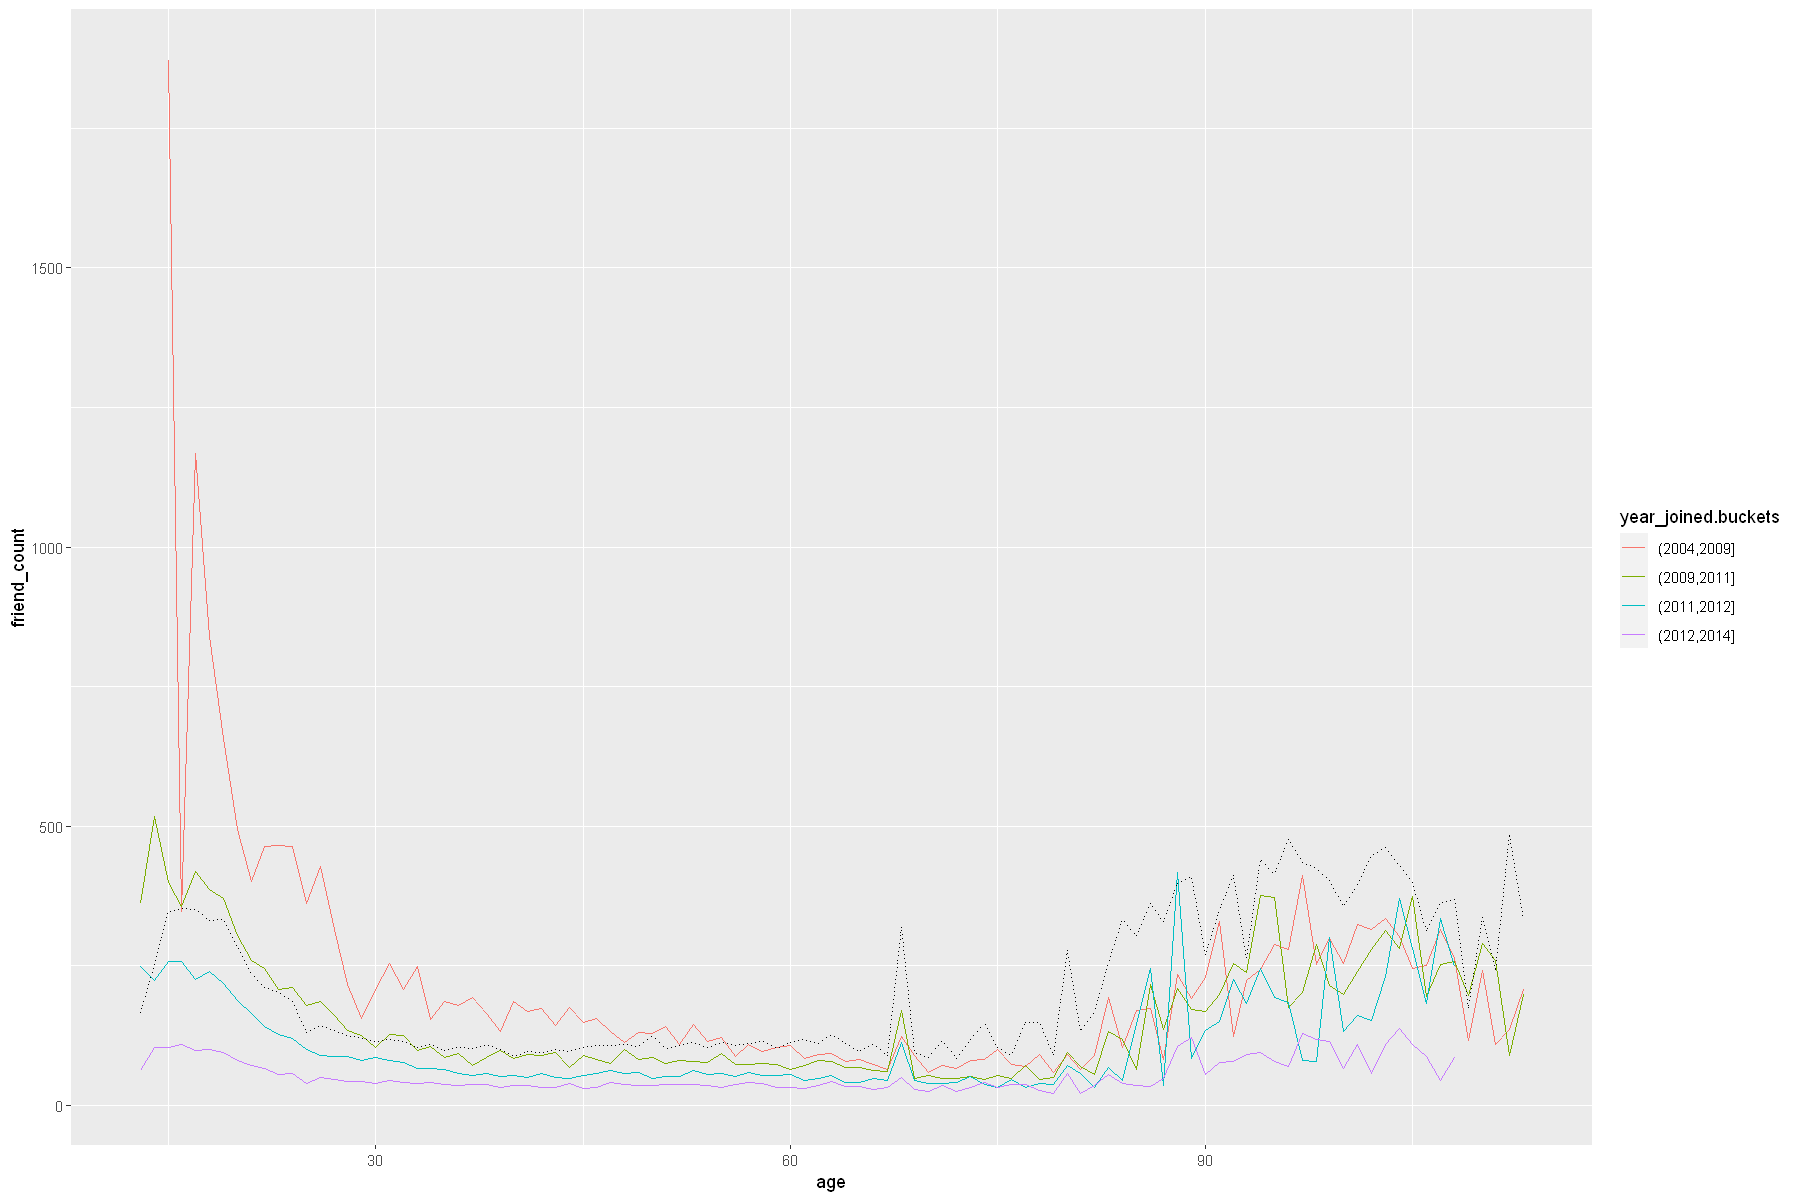

In [55]:
# friend count vs age for year joined buckets
# can use this in jupyter notebook to change size of plots
# options(repr.plot.width=15, repr.plot.height=10)
ggplot(aes(x = age, y = friend_count),
      data = df_fb[!is.na(df_fb$year_joined.buckets),])+
    geom_line(aes(color = year_joined.buckets), stat = "summary", fun = median) +
    geom_line(stat = "summary", fun = mean, linetype = 3)

`summarise()` has grouped output by 'age'. You can override using the `.groups` argument.



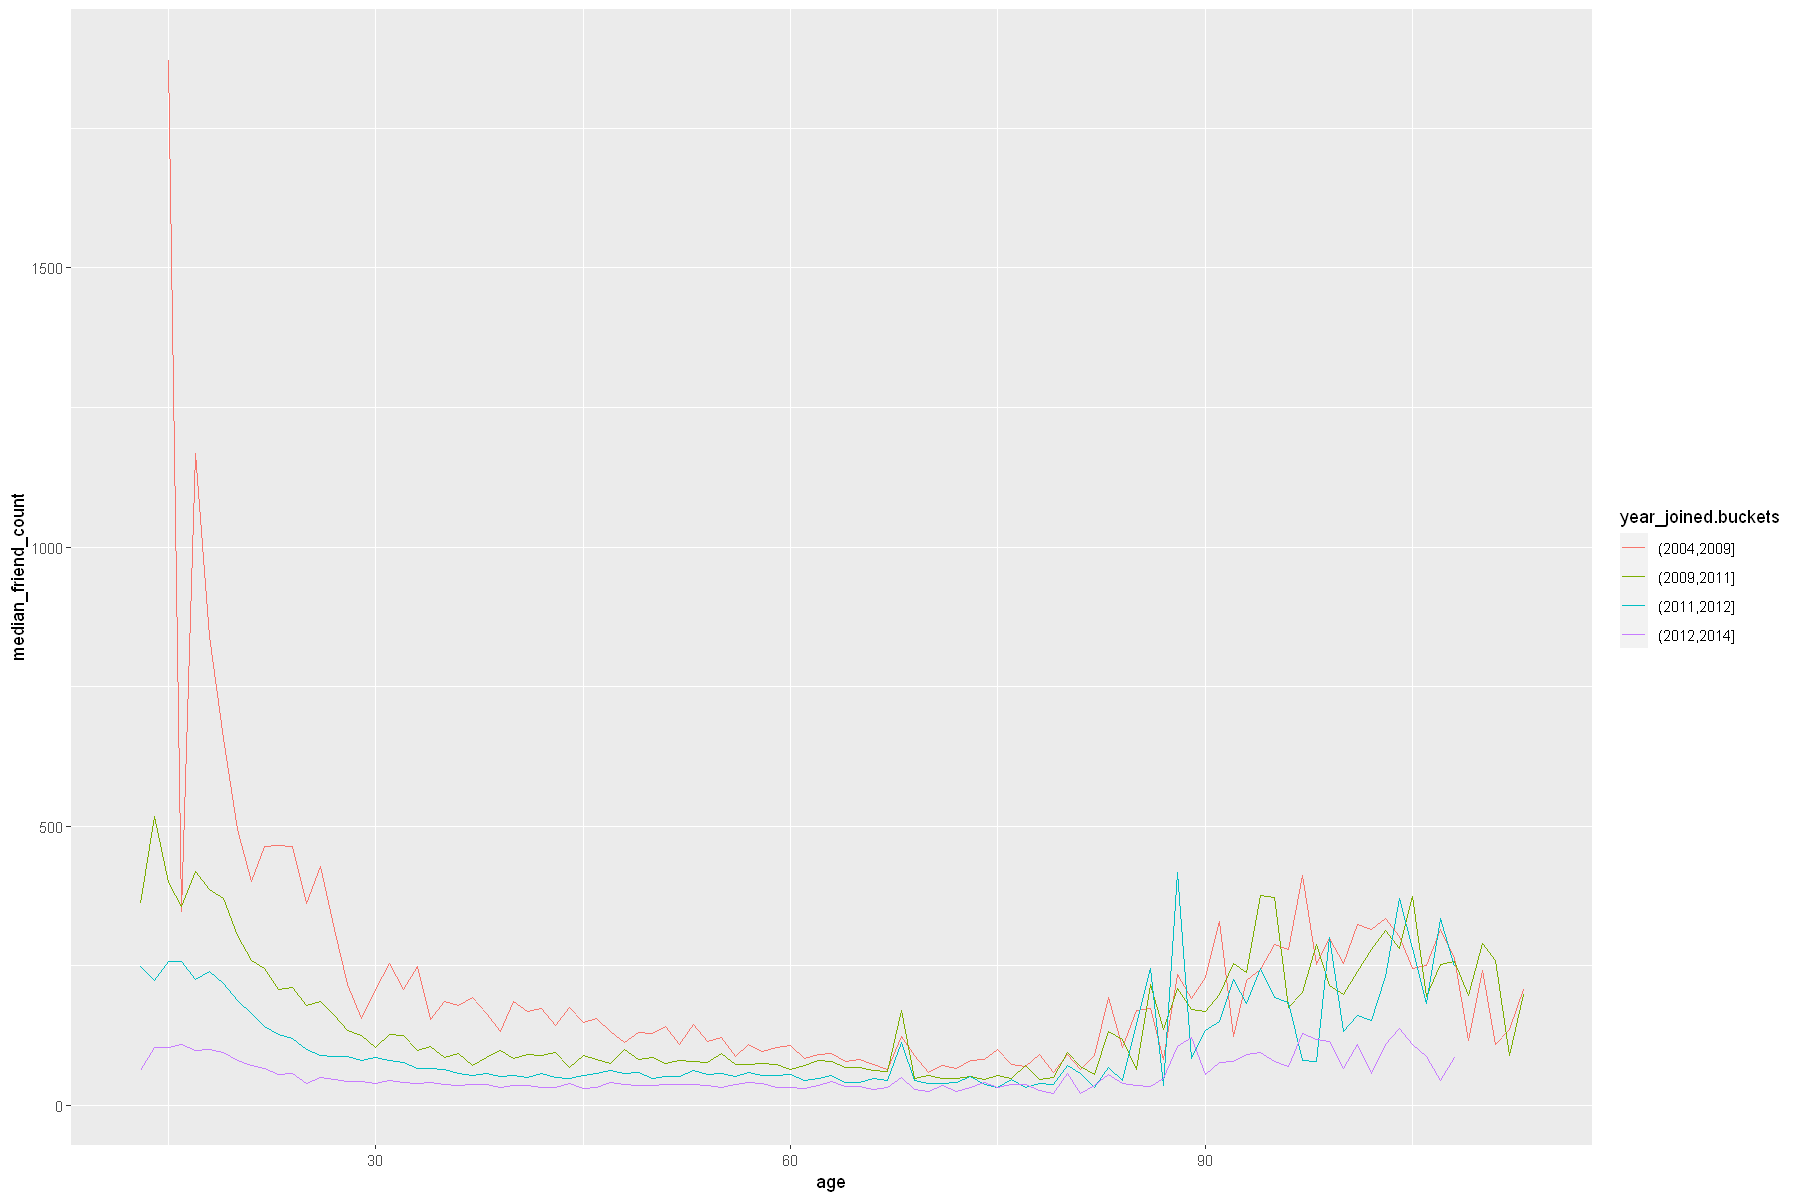

In [57]:
# median friend count vs age for year joined buckets
pf.fb_by_age_year_joined <- df_fb %>%
    filter(!is.na(year_joined.buckets)) %>%
    group_by(age, year_joined.buckets) %>%
    summarize(mean_friend_count = mean(friend_count),
             median_friend_count = median(friend_count),
             n= n()) %>%
    ungroup() %>%
    arrange(age)

ggplot(aes(x = age, y = median_friend_count),
      data = pf.fb_by_age_year_joined) +
    geom_line(aes(color = year_joined.buckets),
             stat = "summary", fun = median)


In [59]:
# rate of friendship
df_fb$friend_rate <- df_fb$friend_count / df_fb$tenure

summary(subset(df_fb$friend_rate, df_fb$friend_rate != Inf))

# or instead of adding a new column
with (subset(df_fb, tenure >= 1), summary(friend_count/tenure))

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
  0.0000   0.0775   0.2205   0.6096   0.5658 417.0000 

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
  0.0000   0.0775   0.2205   0.6096   0.5658 417.0000 

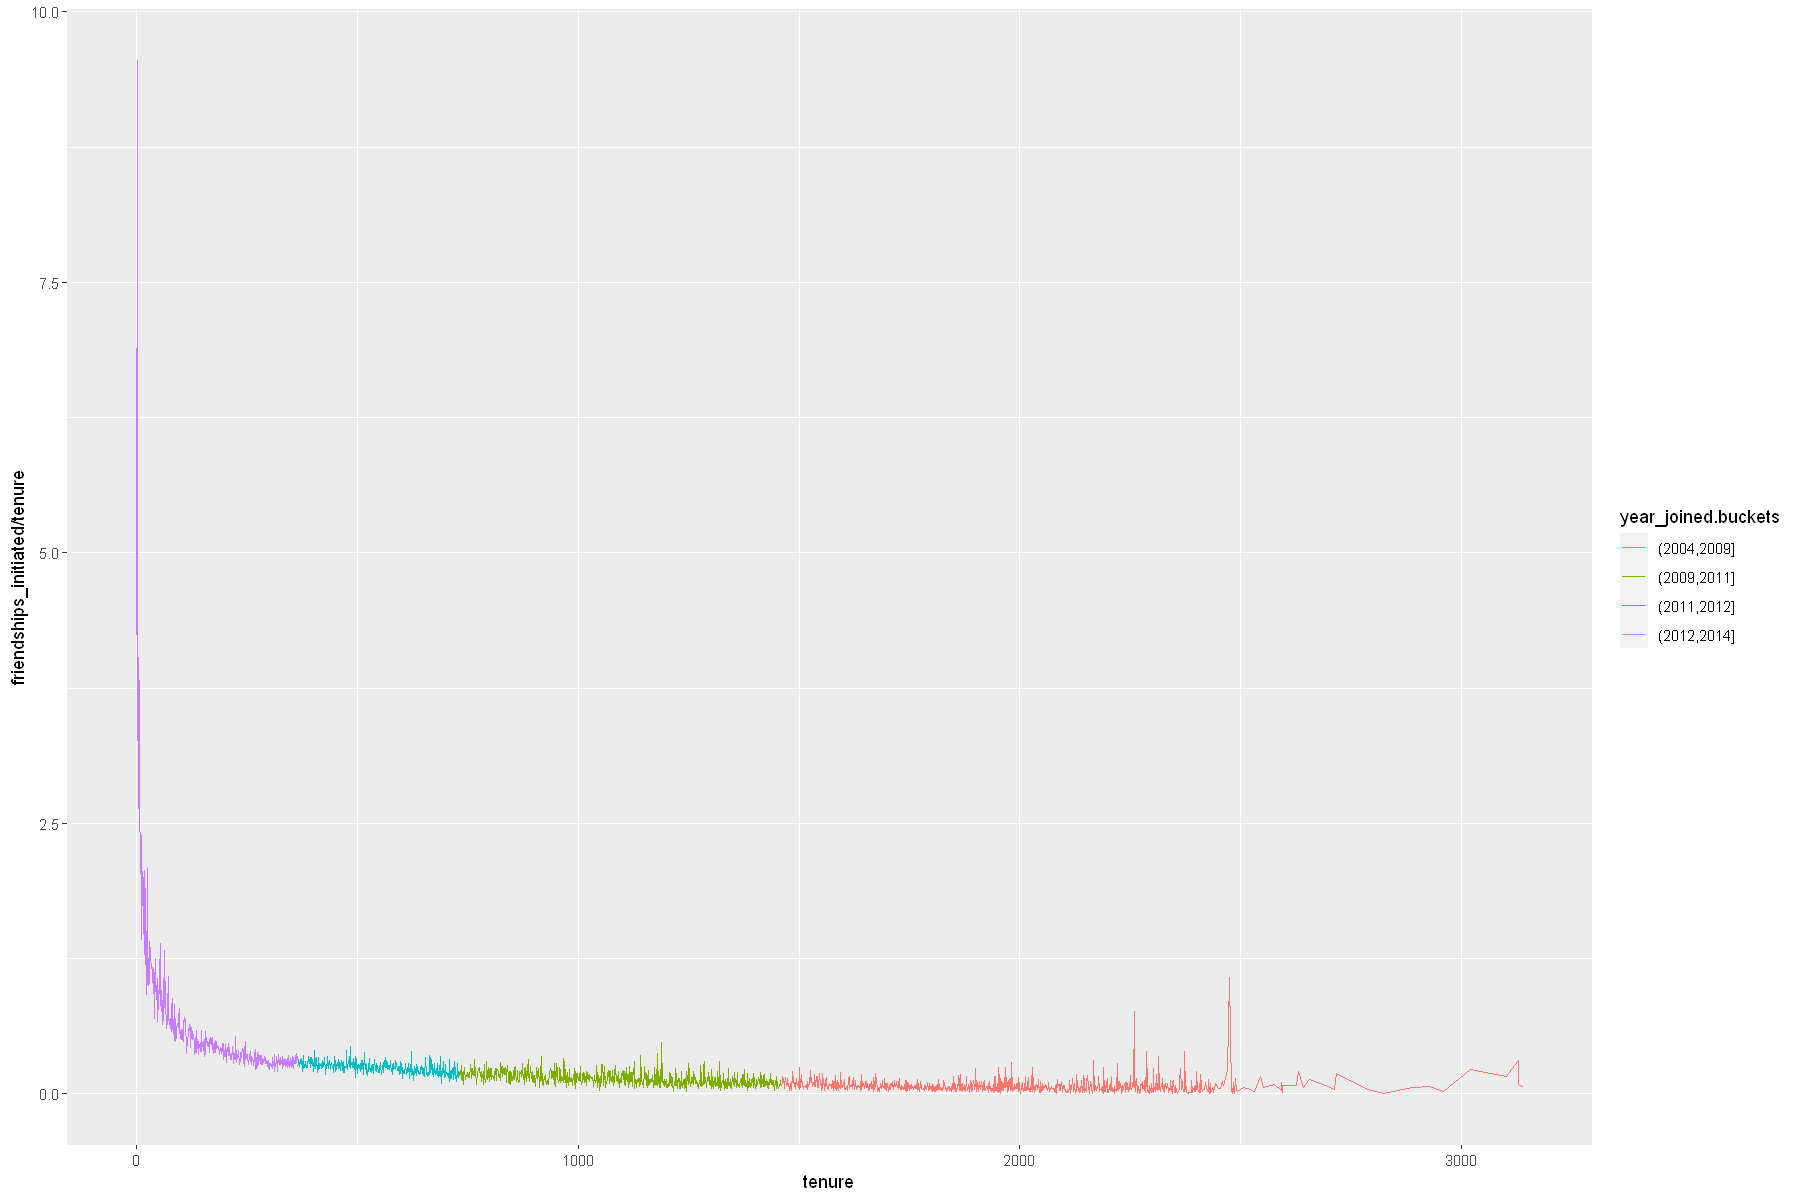

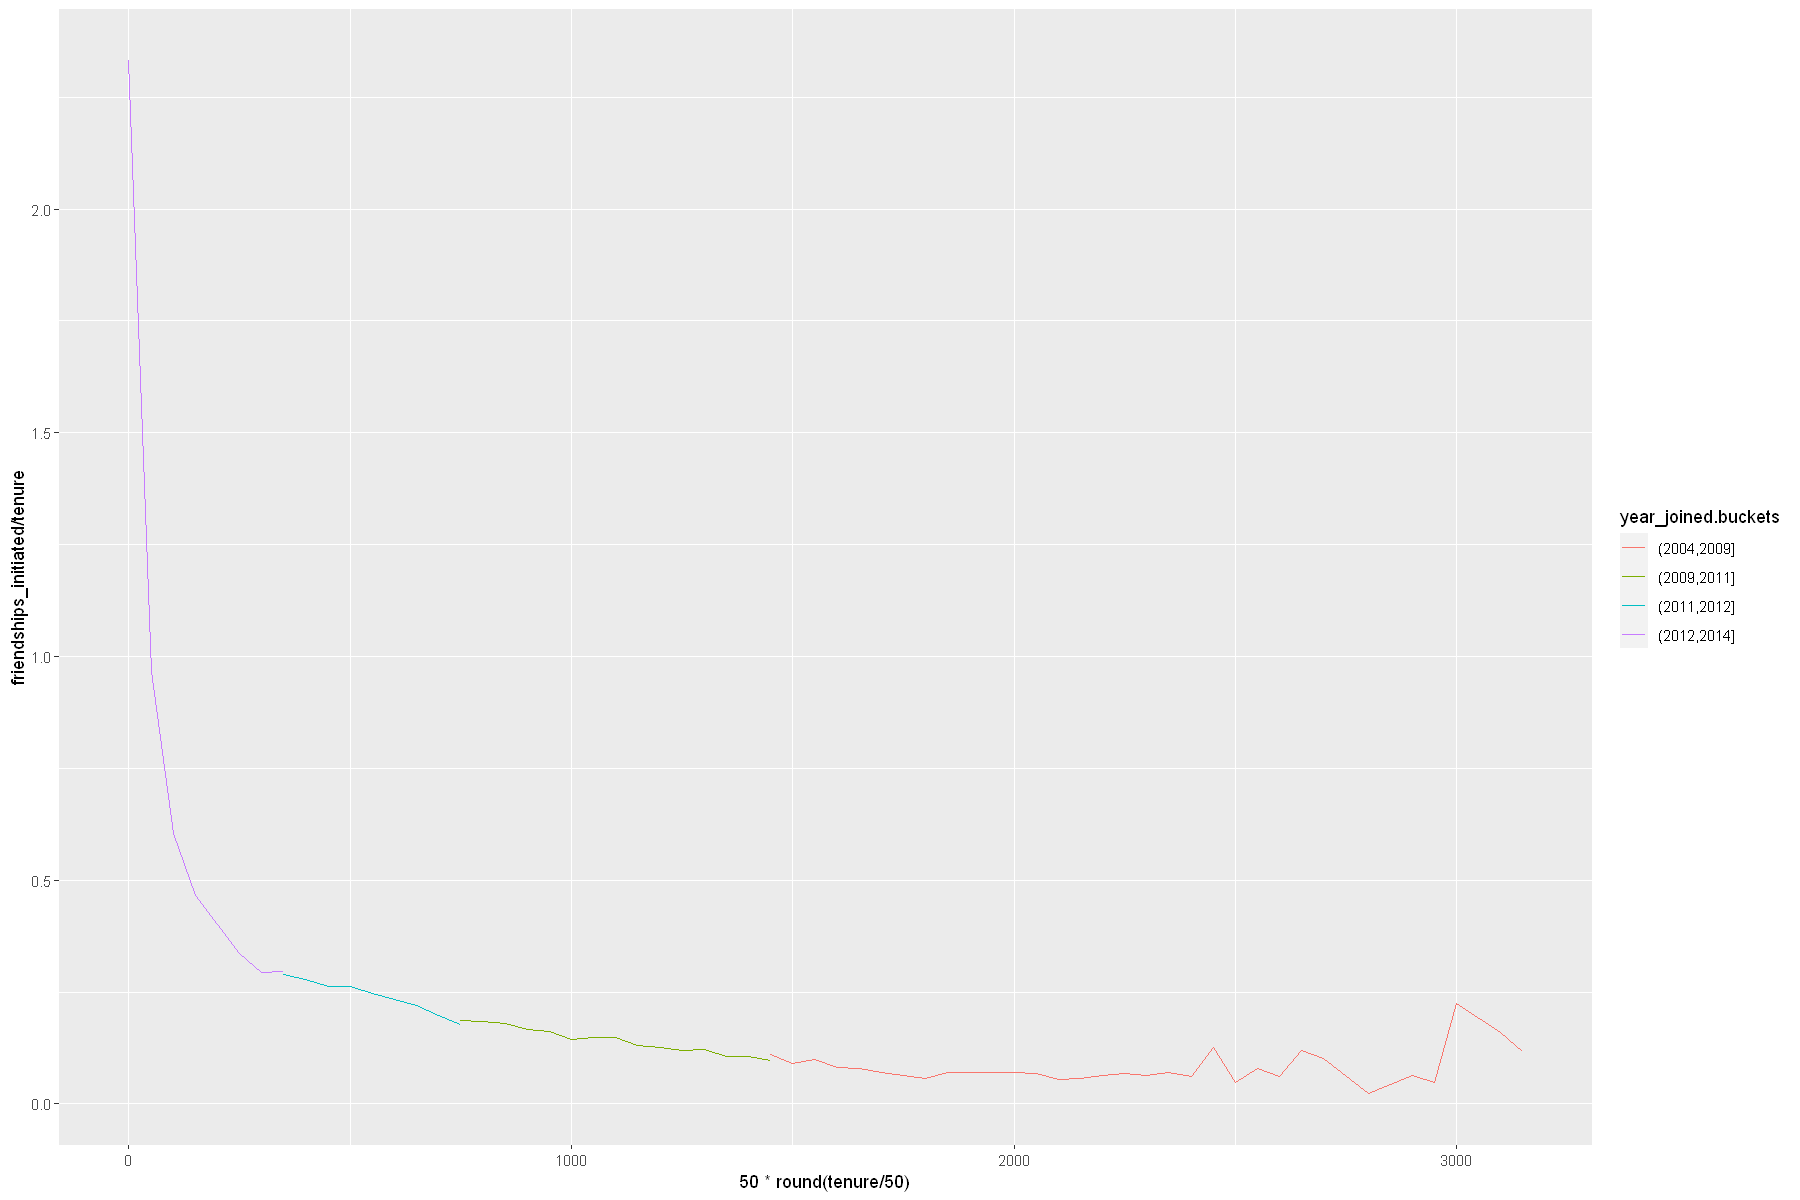

In [62]:
# friendships initiated vs tenure
ggplot(aes(x = tenure, y = friendships_initiated/tenure),
      data = subset(df_fb, tenure >= 1)) +
    geom_line(aes(color = year_joined.buckets),
             stat = "summary", fun = mean)

# making the plot smooth, remove noise
ggplot(aes(x = 50*round(tenure/50), y = friendships_initiated/tenure),
      data = subset(df_fb, tenure >= 1)) +
    geom_line(aes(color = year_joined.buckets),
             stat = "summary", fun = mean)

In [63]:
str(df_fb)

'data.frame':	99003 obs. of  19 variables:
 $ userid               : int  2094382 1192601 2083884 1203168 1733186 1524765 1136133 1680361 1365174 1712567 ...
 $ age                  : int  14 14 14 14 14 14 13 13 13 13 ...
 $ dob_day              : int  19 2 16 25 4 1 14 4 1 2 ...
 $ dob_year             : int  1999 1999 1999 1999 1999 1999 2000 2000 2000 2000 ...
 $ dob_month            : int  11 11 11 12 12 12 1 1 1 2 ...
 $ gender               : chr  "male" "female" "male" "female" ...
 $ tenure               : int  266 6 13 93 82 15 12 0 81 171 ...
 $ friend_count         : int  0 0 0 0 0 0 0 0 0 0 ...
 $ friendships_initiated: int  0 0 0 0 0 0 0 0 0 0 ...
 $ likes                : int  0 0 0 0 0 0 0 0 0 0 ...
 $ likes_received       : int  0 0 0 0 0 0 0 0 0 0 ...
 $ mobile_likes         : int  0 0 0 0 0 0 0 0 0 0 ...
 $ mobile_likes_received: int  0 0 0 0 0 0 0 0 0 0 ...
 $ www_likes            : int  0 0 0 0 0 0 0 0 0 0 ...
 $ www_likes_received   : int  0 0 0 0 0 0 0 0 0 0 ...


In [65]:
# using ggally
# scatterplots between all combinations of important variables
# seed ensures reproducible results
set.seed(12345)
df_subset <- df_fb[,c(2:15)] # all columns except user_id
# ggpairs(df_subset[sample.int(nrow(df_subset), 1000),])
# commenting that line out since it generates the huge graphic

Warning message:
"Removed 2 rows containing missing values (geom_tile)."


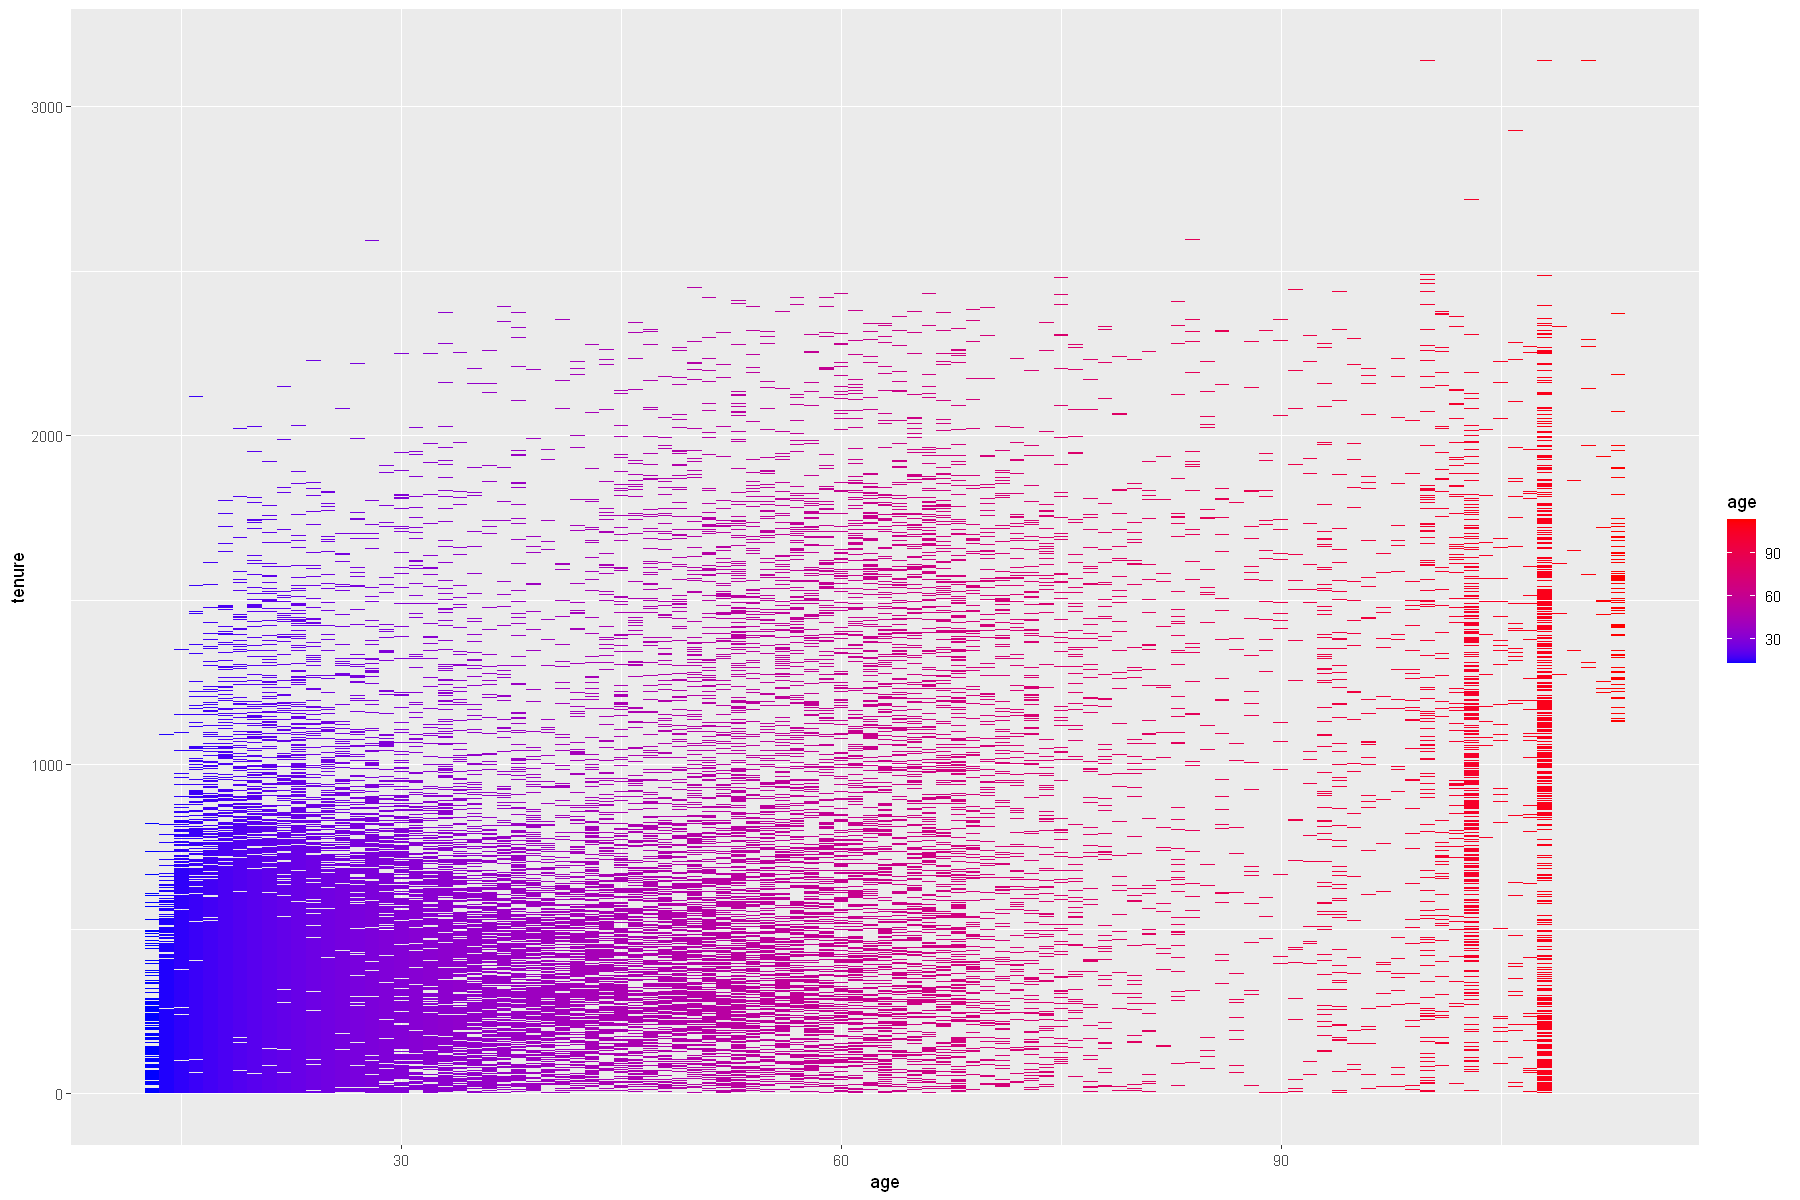

In [98]:
# creating a heat map
ggplot(aes(x = age, y = tenure), data = df_fb) +
     geom_tile(aes(fill = age)) +
     scale_fill_gradient(low = "#0000FF", high = "#FF0000")
# wasn't working until I added the parameter in geom_tile. not sure what parameter goes here

In [99]:
# ratio of friendships initiated and total friend count
df_fb$prop_initiated <- df_fb$friendships_initiated / df_fb$friend_count

Warning message:
"Removed 1964 rows containing non-finite values (stat_summary)."


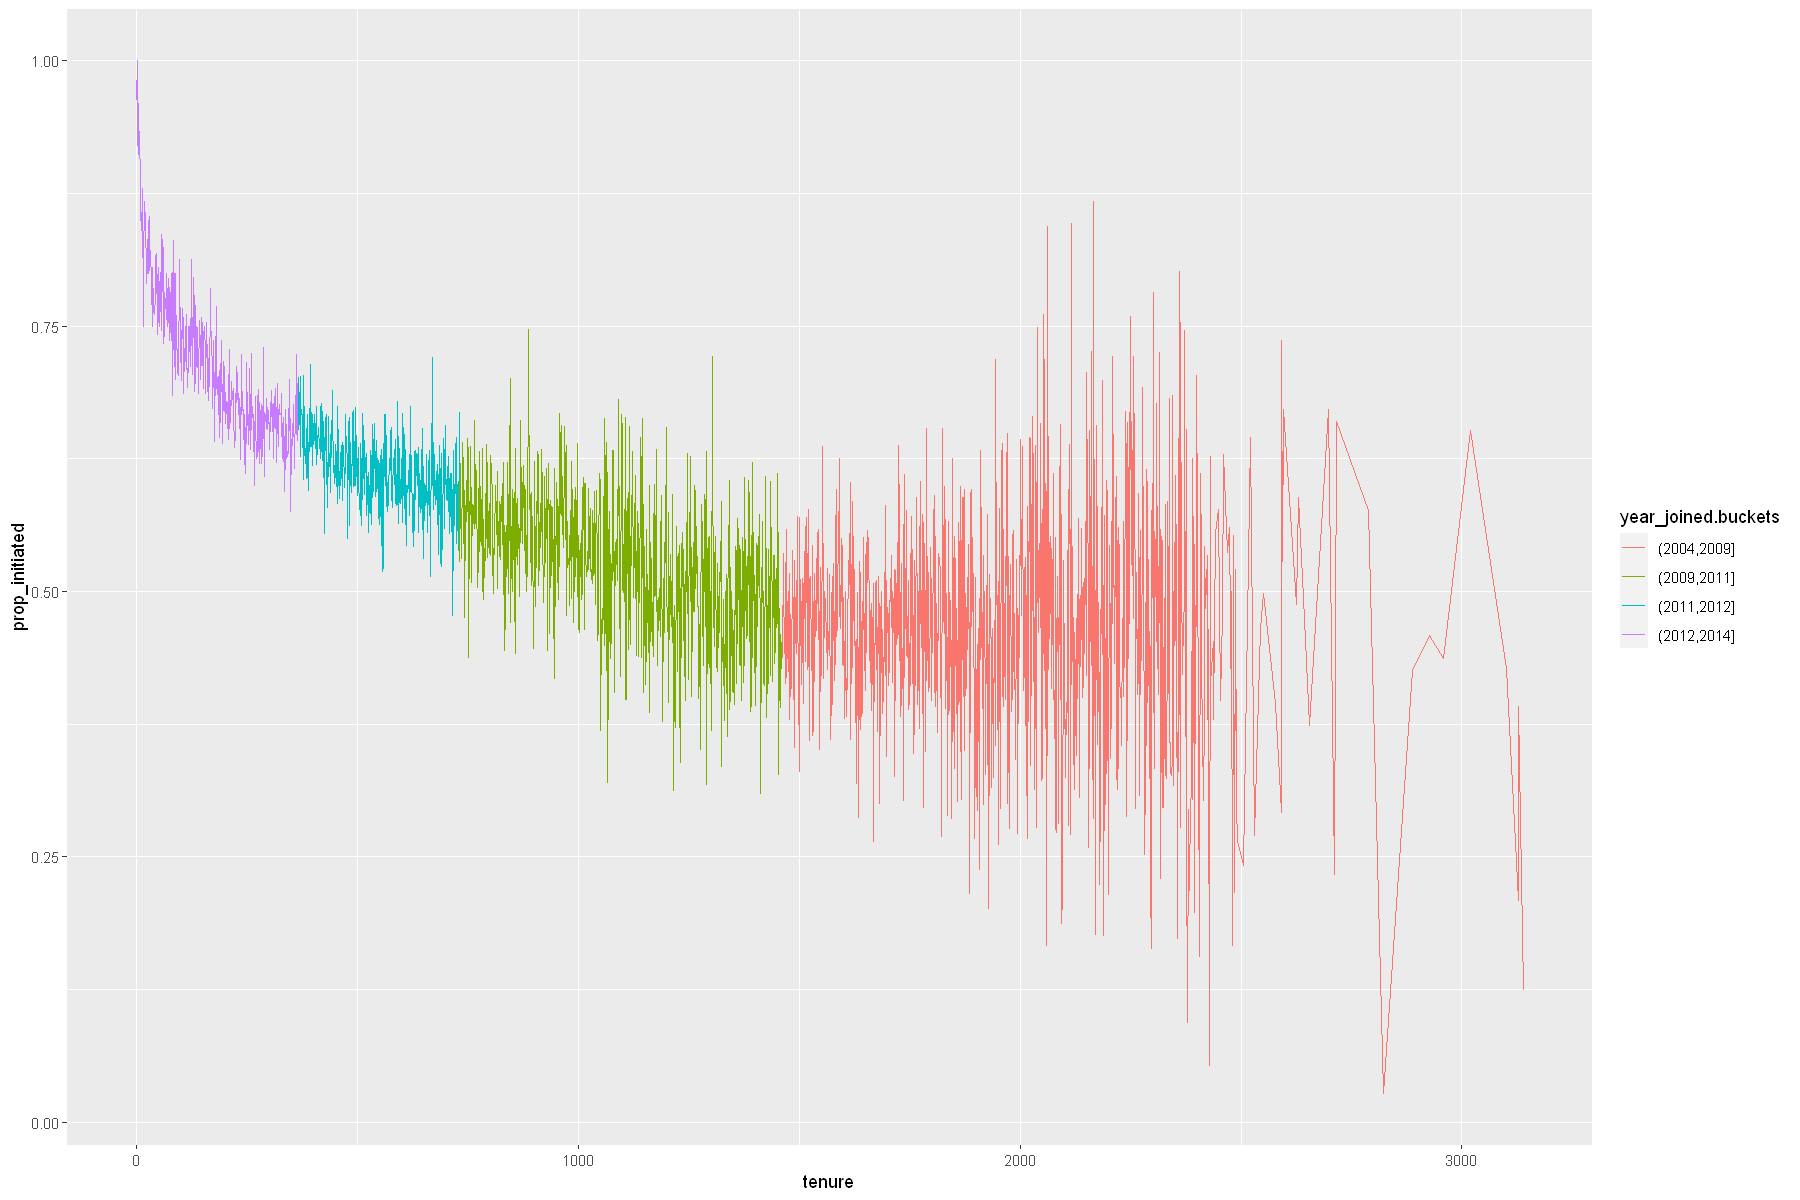

In [117]:
# friendship proportion vs tenure on facebook
ggplot(aes(x = tenure, y = prop_initiated), data = df_fb) +
    geom_line(aes(color = year_joined.buckets),
             stat = "summary", fun = median)         

Warning message:
"Removed 1470 rows containing non-finite values (stat_summary)."
Warning message in max(ids, na.rm = TRUE):
"no non-missing arguments to max; returning -Inf"
Warning message:
"Removed 67 row(s) containing missing values (geom_path)."


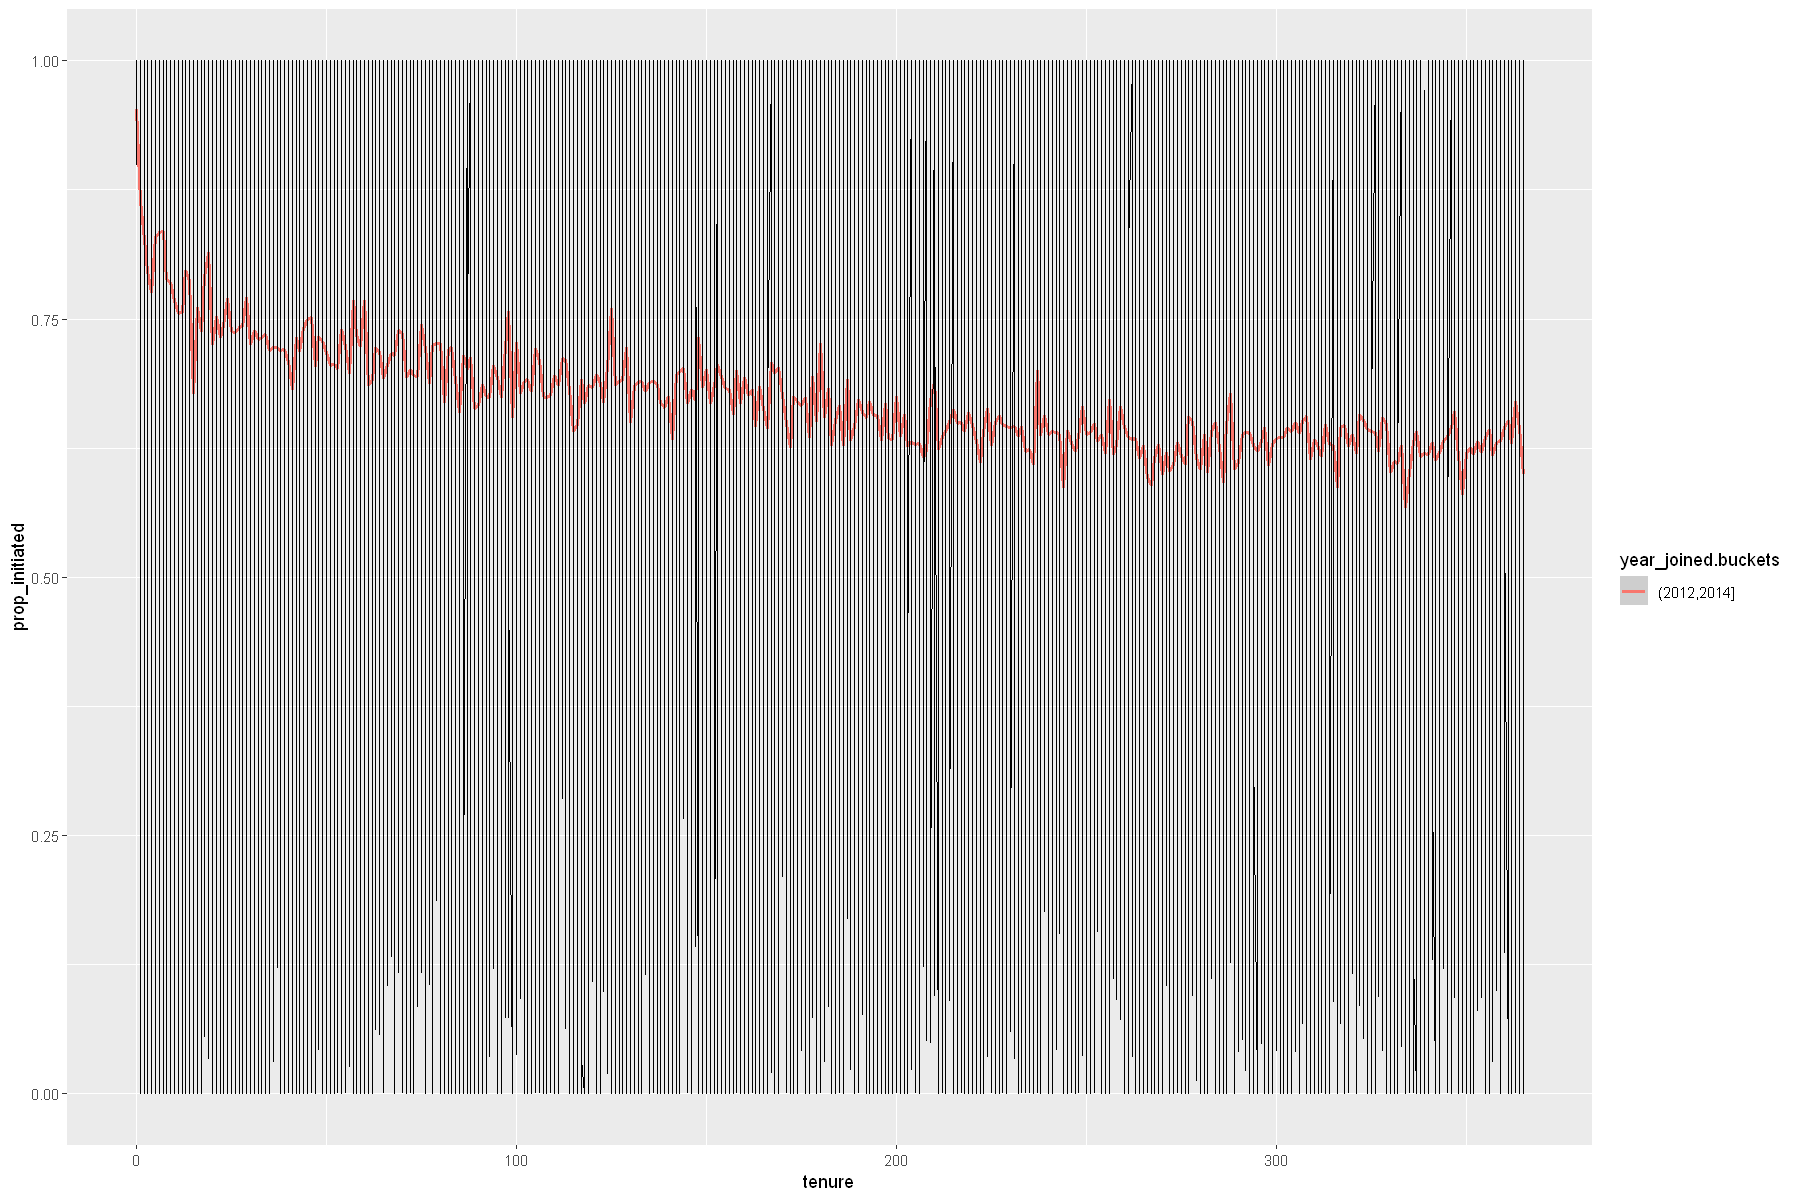

In [120]:
# with plot smoothing
ggplot(aes(x = tenure, y = prop_initiated),
      data = df_fb[df_fb$year_joined <= 2014 & df_fb$year_joined > 2012,]) +
    geom_smooth(aes(color = year_joined.buckets),
               stat = "summary", fun = mean) +
    geom_line()
# not sure what they were going for here